In [61]:
import importlib
import sys

# sys.path.append('home/elias/Genetic-Algorithms/energy optimization/') #Fix this

from pprint import pprint
import numpy as np
from deap import base, creator, tools
import random

import system.GA as GA
 
import datalayer.getdata as getdata
import system.system_ as sys
import system.constraints as constraints

importlib.reload(sys)
importlib.reload(GA)
importlib.reload(getdata)
importlib.reload(constraints)



state = getdata.gen_state()
LOWER_BOUNDS, UPPER_BOUNDS, constraint = constraints.general_constraints(Glmax=max(state["load"]))

[Dmax, Glmax, Gbmax, Bmax, N_HOURS] = constraint

genome=96

In [62]:
test = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
print(test)


[0.00000000e+00 1.70510738e+01 2.57478278e+00 9.04211696e+00
 1.94925187e+01 8.03989845e+00 1.94541322e+01 1.00115748e+01
 2.05080127e+01 1.79794752e+01 2.16548115e+01 2.67549968e+01
 1.64550349e+01 1.66595643e+01 2.33296454e+01 2.33995566e+01
 3.81037943e+00 1.89481905e+01 1.97444359e+01 2.45049958e+01
 2.67099754e+01 2.44841188e+01 1.48461340e+01 7.24647697e+00
 5.83252290e+01 3.97252777e+01 5.32617178e+01 4.61050700e+01
 3.60315501e+01 4.99194446e+01 4.42053949e+01 5.76062432e+01
 4.85056890e+01 5.07958346e+01 4.67738734e+01 4.13578249e+01
 5.13162529e+01 5.00693281e+01 4.31120934e+01 4.35984721e+01
 6.52352465e+01 5.08062366e+01 4.85378207e+01 4.17682464e+01
 3.74085871e+01 3.76497421e+01 4.54447031e+01 5.09597436e+01
 4.61022298e+00 1.64881046e+01 8.65395924e+00 1.24623816e+01
 4.29617505e+00 5.01538910e+00 6.90722866e+00 1.29311000e+01
 2.82343315e+00 1.44143041e+01 5.06811349e+00 4.93540242e+00
 3.50929066e-01 7.08032930e+00 1.10597601e+01 1.81275901e-01
 1.45032788e+01 1.225400

In [63]:
test = GA.create_population(2,96, LOWER_BOUNDS, UPPER_BOUNDS)
print(test)

[[0.00000000e+00 5.90879465e+00 6.88962863e+00 1.11215139e+01
  1.35777830e+01 1.04497760e+01 6.40667705e+00 2.56309696e+01
  1.21270178e+01 6.92874113e+00 6.77360632e-01 7.85027499e+00
  1.43612244e+01 2.57985164e+01 1.63745697e+01 8.85384184e+00
  2.48358653e+01 7.04701693e+00 2.27002212e+01 6.49410316e+00
  3.40632963e+00 7.18500694e+00 1.38740944e+01 4.08267641e+00
  5.83252290e+01 5.08675569e+01 4.89468719e+01 4.40256731e+01
  4.19462859e+01 4.75095671e+01 5.72528501e+01 4.19868484e+01
  5.68866839e+01 6.18465687e+01 6.77513242e+01 6.02625467e+01
  5.34100634e+01 4.09303760e+01 5.00671691e+01 5.81441868e+01
  4.42097606e+01 6.27074101e+01 4.55820354e+01 5.97791391e+01
  6.07122329e+01 5.49488540e+01 4.64167427e+01 5.41235442e+01
  8.71995056e+00 1.19812855e+01 2.02936542e+00 1.96072799e+01
  1.39442689e+01 1.76746656e+01 1.54802724e+01 1.37977309e+01
  1.38651808e+01 1.65864295e+01 5.73707379e+00 5.34667556e+00
  4.53627733e+00 1.71233877e-01 9.16227874e+00 1.51754512e+01
  1.9033

In [64]:
state["time"] = state["time"].dt.strftime("%Y-%m-%d %H:%M")
print(state)

                time  spotprice  irradiance       load
0   2025-12-15 00:00      24.47        0.00  58.325229
1   2025-12-15 01:00      23.54        0.00  56.776352
2   2025-12-15 02:00      21.33        0.00  55.836501
3   2025-12-15 03:00      19.61        0.00  55.147187
4   2025-12-15 04:00      18.39        0.00  55.524069
5   2025-12-15 05:00      21.42        0.00  57.959343
6   2025-12-15 06:00      27.61        0.00  63.659527
7   2025-12-15 07:00      38.81        0.01  67.617818
8   2025-12-15 08:00      44.65        1.66  69.013702
9   2025-12-15 09:00      43.73       11.98  68.775310
10  2025-12-15 10:00      43.60       30.46  68.428685
11  2025-12-15 11:00      44.56       46.58  68.112822
12  2025-12-15 12:00      45.85       59.39  67.771288
13  2025-12-15 13:00      46.98       46.87  66.728892
14  2025-12-15 14:00      46.34        8.22  66.441739
15  2025-12-15 15:00      47.00        0.44  66.998029
16  2025-12-15 16:00      47.93        0.00  69.045626
17  2025-1

In [65]:
individual = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
D, Gb, Gl, g = GA.unpack(individual)

N_HOURS = 24

B = np.zeros(N_HOURS + 1)

for t in range(N_HOURS):
    print(sys.solar_gen(t, state))
    B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]

    if not constraints.battery_constraints(t, D, B, Bmax):
        print(False)


#test = sys.battery_sim(D,Gb,g, state, Bmax=100, N_HOURS=24)

0.0
False
0.0
False
0.0
False
0.0
0.0
0.0
0.0
2.9999999999999997e-05
0.004979999999999999
0.03594
0.09137999999999999
0.13974
0.17817000000000002
0.14060999999999998
0.024660000000000005
0.00132
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [66]:



population = GA.create_population(100,96, LOWER_BOUNDS, UPPER_BOUNDS)


x_dim, y_dim = population.shape

D, Gl, Gb, g = GA.unpack(population[0,:])
print(Gl)


x = GA.fitness(population[0,:], state, LOWER_BOUNDS, UPPER_BOUNDS, constraint)

print(x)

[58.32522903 50.55644221 45.56698815 49.23664276 49.63570432 52.42264611
 61.26023797 37.98237575 43.18723936 59.79579642 65.16888646 48.19979918
 60.63273144 45.00849197 49.91168411 56.22384019 47.21993912 43.50753374
 43.74860589 46.13333752 40.39595446 46.2123205  44.30912097 47.96159984]
(np.float64(1056478.596796943),)


In [67]:
toolbox = base.Toolbox()



# Fitness: minimize cost ⇒ weight = -1.0
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Individual = list with attached fitness
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [68]:


population_dp = [creator.Individual(ind.tolist()) for ind in population]

# Register the evaluation function
toolbox.register("evaluate", GA.fitness, state=state, LOWER_BOUNDS=LOWER_BOUNDS, UPPER_BOUNDS=UPPER_BOUNDS, constraint=constraint)


# Tournament selection (tournsize = 3 is typical)
toolbox.register("select", tools.selTournament, tournsize=3)

offspring = toolbox.select(population_dp, len(population_dp))
offspring = list(map(toolbox.clone, offspring))



In [69]:
toolbox.register("mate", tools.cxBlend, alpha=0.3)

CXPB = 0.9  # crossover probability

# Inside the GA evolution loop:
for i in range(1, len(offspring), 2):
    if random.random() < CXPB:
        toolbox.mate(offspring[i-1], offspring[i])

In [70]:
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=list(LOWER_BOUNDS),
    up=list(UPPER_BOUNDS),
    eta=20,
    indpb=0.05
)

MUTPB = 0.2

for mutant in offspring:
    if random.random() < MUTPB:
        toolbox.mutate(mutant)
        del mutant.fitness.values

In [71]:
POP_SIZE = 100
MAX_GEN = 25

population = GA.create_population(POP_SIZE,96, LOWER_BOUNDS, UPPER_BOUNDS)
population_dp = [creator.Individual(ind.tolist()) for ind in population]
population = population_dp

pprint(population[:5])  # Print first 5 individuals to inspect


[[0.0,
  1.6438236293266157,
  16.659582594565723,
  21.743635316469756,
  16.993320399122062,
  24.010247388368324,
  11.033688877456909,
  12.750211971367118,
  13.773426895954108,
  21.155413628327647,
  25.765614324044147,
  22.734880526434072,
  24.28416137652972,
  10.01467909329436,
  21.609833217654312,
  4.8868796985597625,
  17.05490362272134,
  14.6019654139254,
  5.763952850383889,
  10.943963709678503,
  20.00070900564609,
  21.841913264694675,
  21.97952726135857,
  13.850317604508849,
  58.325229033333336,
  55.13252790817338,
  39.17691796376761,
  33.40355166686358,
  38.5307484300446,
  33.94909571163168,
  52.62583827670976,
  54.86760601613289,
  55.24027476237922,
  47.619896221672356,
  42.66307053012253,
  45.37794113189926,
  43.487126410970276,
  56.71421334837231,
  44.83190553234569,
  62.11114898477357,
  51.990722293945325,
  55.152461623574595,
  62.51830375794944,
  55.32927856948817,
  44.117853473520576,
  40.29194770197199,
  38.31130985947476,
  44.35

In [72]:
fitness_history = []

for gen in range(MAX_GEN):

    # --- SELECTION ---
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # --- CROSSOVER ---
    for i in range(1, len(offspring), 2):
        if random.random() < CXPB:
            toolbox.mate(offspring[i-1], offspring[i])
            del offspring[i-1].fitness.values
            del offspring[i].fitness.values

    # --- MUTATION ---
    for ind in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(ind)
            del ind.fitness.values

    # --- EVALUATE IF NEEDED ---
    invalid = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid:
        ind.fitness.values = toolbox.evaluate(ind)

    # --- ELITIST REPLACEMENT (μ + λ) ---
    population = tools.selBest(population + offspring, POP_SIZE)

    best = tools.selBest(population, 1)[0]
    best_fitness = best.fitness.values[0]
    fitness_history.append(best_fitness)

    # print progress
    print(f"Gen {gen}: Best = {best_fitness}")


Gen 0: Best = 1054383.5917492972
Gen 1: Best = 1054383.5917492972
Gen 2: Best = 1054383.5917492972
Gen 3: Best = 1054383.5917492972
Gen 4: Best = 1054383.5917492972
Gen 5: Best = 1053231.6354081642
Gen 6: Best = 1052833.5408846508
Gen 7: Best = 1052764.986260665
Gen 8: Best = 1052268.5853283145
Gen 9: Best = 1051954.5785372863
Gen 10: Best = 1051954.5785372863
Gen 11: Best = 1051236.5615680527
Gen 12: Best = 1050563.2696922573
Gen 13: Best = 1050563.2696922573
Gen 14: Best = 1050242.1036309856
Gen 15: Best = 1049918.4464813254
Gen 16: Best = 1049646.024876434
Gen 17: Best = 1048896.7701333065
Gen 18: Best = 1048896.7701333065
Gen 19: Best = 1048463.9773400924
Gen 20: Best = 1047787.9637432382
Gen 21: Best = 1047558.0510806234
Gen 22: Best = 1046959.1801315801
Gen 23: Best = 1046731.4702352798
Gen 24: Best = 1046096.9274569623


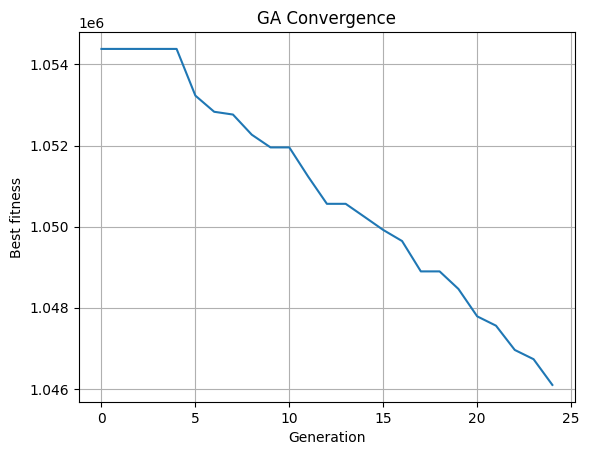

In [73]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.title("GA Convergence")
plt.grid(True)
plt.show()

In [74]:
best = tools.selBest(population, 1)[0]
def extract_variables(best_individual):
    D     = np.array(best_individual[0:N_HOURS])
    Gb    = np.array(best_individual[N_HOURS:2*N_HOURS])
    Gl    = np.array(best_individual[2*N_HOURS:3*N_HOURS])
    gamma = np.array(best_individual[3*N_HOURS:4*N_HOURS])
    return D, Gl, Gb, gamma

D_opt, Gb_opt, Gl_opt, gamma_opt = extract_variables(best)

print("Optimal Battery Discharge D(t):", D_opt)
print("Optimal Grid-to-Load Gl(t):", Gl_opt)
print("Optimal Grid-to-Battery Gb(t):", Gb_opt)
print("Optimal Renewable Fraction γ(t):", gamma_opt)



Optimal Battery Discharge D(t): [ 0.          4.06820045 14.8833979  16.7630515  20.43631647 15.91569196
 24.60260687  8.34981844 14.69580182 24.88176234  9.81801838 14.26118692
 21.38861244  8.55606828  9.94187245 14.13857059 22.90683135 14.8306844
 16.9855942  17.30132383 21.16099895 13.92891887 14.240067    6.3255732 ]
Optimal Grid-to-Load Gl(t): [54.4909446  43.41029823 40.68476747 39.46277062 39.30186547 43.88834342
 37.20579683 57.15147213 54.14193592 41.50823818 37.30498968 54.72580363
 46.56058332 36.31964885 39.71347102 38.74538893 40.38968231 38.12221631
 45.26324583 43.90633885 37.06312806 22.41760752 31.89714144 52.00097394]
Optimal Grid-to-Battery Gb(t): [13.75451389  4.90199789 10.33471618  2.25734021 14.32957561 13.02335526
 13.59512891  9.16951225  5.42280022  3.97041323  6.44787799  8.74001181
  4.16863921 15.28974219  8.51187763  6.26904699  2.70191496  3.91256848
  4.98312193  0.14500806  4.77655901  2.06522208  4.29628545  8.31238213]
Optimal Renewable Fraction γ(t)

(np.float64(1046096.9274569623),)
D 0.0
Gb 13.754513889160824
G_in 0.0
D 4.068200453478481
Gb 4.901997894856687
G_in 0.0
D 14.883397903951753
Gb 10.33471618314838
G_in 0.0
D 16.763051496025554
Gb 2.2573402070607473
G_in 0.0
D 20.436316466905428
Gb 14.329575610644945
G_in 0.0
D 15.915691961759045
Gb 13.02335525829485
G_in 0.0
D 24.602606871787334
Gb 13.595128907440857
G_in 0.0
D 8.34981843552442
Gb 9.169512254623436
G_in 2.900985932592326e-05
D 14.695801818217703
Gb 5.422800221004483
G_in 0.002369006233945984
D 24.881762342148434
Gb 3.9704132285824034
G_in 0.026463115966119864
D 9.818018377132073
Gb 6.44787799328194
G_in 0.04839769557121725
D 14.261186921431994
Gb 8.74001181020504
G_in 0.08339484805459141
D 21.38861243671998
Gb 4.16863920584483
G_in 0.10311024200281393
D 8.556068276572388
Gb 15.289742192785159
G_in 0.03804010682924016
D 9.941872447333537
Gb 8.51187763489088
G_in 0.020952958672986813
D 14.13857058740505
Gb 6.2690469917492795
G_in 0.00036596131646254225
D 22.9068313518726

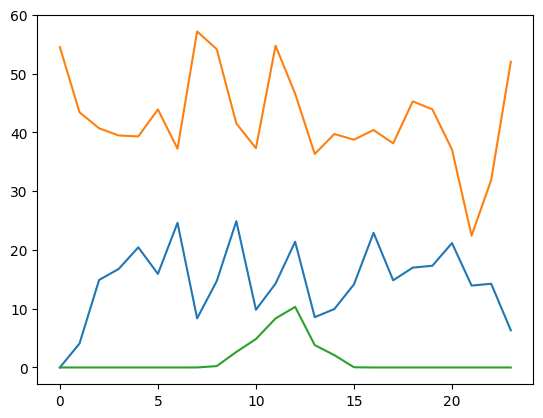

In [87]:

importlib.reload(GA)

print(GA.fitness(np.concatenate([D_opt, Gl_opt, Gb_opt, gamma_opt]), state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

D, Gl, Gb, g = GA.unpack(indi)
i = 0
sol = np.zeros(len(D))

for i in range(len(D)):

    print("D", D_opt[i])
    print("Gb", Gb_opt[i])
    print("G_in", gamma_opt[i] *sys.solar_gen(i, state)) 
    sol[i] = gamma_opt[i] *sys.solar_gen(i, state)


def battery_sim(D,Gb,g, state, B_0=0, Bmax=100, N_HOURS=24):
    B = np.zeros(N_HOURS + 1)
    B[0] = B_0

    for t in range(N_HOURS):
        B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]
        
        if (B[t + 1] > Bmax):
            B[t + 1] = Bmax

        if (B[t] < D[t]):
            return False, B
        

    return True, B

print(battery_sim(D_opt, Gl_opt, gamma_opt, state))

plt.plot(D_opt)
plt.plot(Gl_opt)
plt.plot(100 * sol)
plt.show()

0.0


In [76]:
t = 0

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)



D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)
#print(state["load"])

def load_constraints(t, D, Gl, state):
    # Load (t) = Gl(t) + D(t)
    # print(Gl[t] + D[t] - state["load"].iloc[t])
    return abs(Gl[t] + D[t] - state["load"].iloc[t]) < 1

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    



load = state["load"].iloc[t]
print(load)



[ 0.          8.9326399  24.24015013 19.04469944  1.35204832  9.58723579
  7.66534331 12.5383057  14.49420166 14.33438744 27.97819344 25.81894197
 25.02904128 15.82777969 16.65304528  7.34021541 25.73003788 16.70297236
  3.47222967 24.73690984 21.61893517 24.09234887 14.69093107  7.44493653]
[58.32522903 47.84371164 31.59635043 36.10248754 54.17202051 48.37210731
 55.99418384 55.07951228 54.5195     54.44092241 40.45049141 42.29387969
 42.74224651 50.90111275 49.78869347 59.65781328 43.31558803 53.05145468
 64.81002694 41.53633244 42.49962731 38.0415121  45.59990605 50.76128407]
58.2062206


In [77]:
importlib.reload(GA)

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

# print(GA.fitness(individual, state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    else:
        print(True)



[ 0.          0.92765753 15.18493751  3.40536491 18.13806576  7.02628145
 16.48839432  9.15319874 21.2300592  28.82581605 11.84230692 14.05119866
 20.8145255   1.83420121  9.85657078 14.63423754 16.39480322 26.06206762
  9.3527607  28.65724031 22.17777493 27.37507568  0.85553906 15.1279279 ]
[58.32522903 55.84869401 40.65156305 51.74182207 37.38600307 50.93306165
 47.17113283 58.46461925 47.78364246 39.9494938  56.58637793 54.061623
 46.95676228 64.89469123 56.58516797 52.36379114 52.65082269 43.69235942
 58.92949591 37.61600197 41.94078755 34.75878529 59.43529807 43.0782927 ]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
